In [2]:
import numpy as np
import xarray as xr
import matplotlib 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
ds = xr.tutorial.open_dataset('air_temperature').load()

# Inspecting data

In [4]:
## Default
ds

## ncdump-style
#ds.info()

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Inspect the dimensions / coordinates / attributes of `ds` using `.dims` / `.coords` / `.attrs` 

In [7]:
ds.coords

Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

Similarly, inspect the attributes of variable / DataArray `ds.air`

In [10]:
ds.air.attrs['units']

'degK'

# Indexing data

In [11]:
## Numpy style
ds.air[0,:,:]

## Pandas style, time
#ds.sel(time='2013-01-01')

## Pandas style, location
#ds.sel(lon=260, lat=50, method='nearest')

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    , 238.59999],
       [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999, 239.29999],
       [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   , 241.7    ],
       ...,
       [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    , 294.69998],
       [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    , 295.19998],
       [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   , 296.6    ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalys

# Arithmetic
See documentation here: http://xarray.pydata.org/en/stable/computation.html#

Compute new variable `air2` which is the square of the air temperature

In [12]:
air2 = ds.air**2

Compute new variable `airC` which is the temperature in Celcius

In [19]:
airC = ds.air - 273.15
airC.attrs['units'] = 'degC' # optional

Compute the time mean over `air` and `airC` and store as `air_mean` and `airC_mean`

In [24]:
air_mean = ds.air.mean(dim='time')
airC_mean = airC.mean(dim='time')
airC_mean.dims

('lat', 'lon')

Compute the zonal mean of `airC` and name it `airC_zonal`. Verify its dimensions.

In [26]:
airC_zonal = airC.mean(dim='lon')
airC_zonal.dims

('time', 'lat')

Now compute the standard deviation in time of `airC_zonal`, which will have one dimension (latitude)

In [27]:
airC_zonal.std(dim='time')

<xarray.DataArray 'air' (lat: 25)>
array([11.42011 , 12.064088, 12.778461, 12.554228, 11.552493, 10.416452,
        9.182376,  8.623344,  8.493028,  8.241404,  7.724502,  7.160678,
        6.806434,  6.356828,  5.843055,  5.270125,  4.603539,  3.954268,
        3.282611,  2.592511,  1.981556,  1.591539,  1.374133,  1.173974,
        0.937342], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0

# Plotting

Select the gridpoint closest to (lat,lon) = (50, 260) and plot the time evolution of temperature

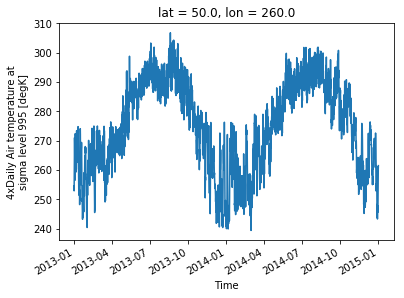

In [29]:
ds.air.sel(lat=50, lon=260, method='nearest').plot()

Now plot the mean temperature over the entire region in a XY-diagram. 

Hint: Use the `dim=` keyword http://xarray.pydata.org/en/stable/computation.html#aggregation

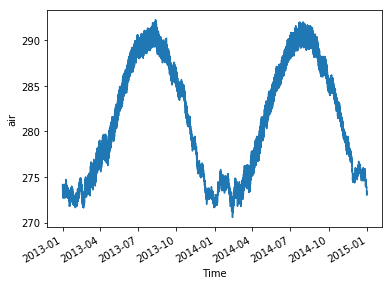

In [31]:
ds.air.mean(dim=['lat','lon']).plot()

Plot the 30-day rolling min/max/mean all together in a XY-diagram

http://xarray.pydata.org/en/stable/computation.html#rolling-window-operations

/Users/leo/anaconda3/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


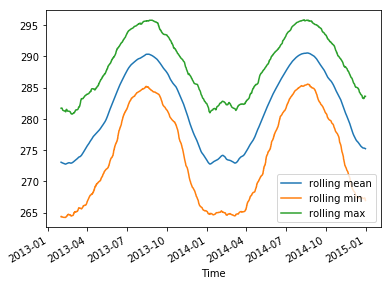

In [36]:
# the data is sampled at 6 hourly intervals , so a 30-day rolling mean corresponds to a window length of 120 samples 
ds.air.rolling(time=120).mean().mean(dim=['lat','lon']).plot(label='rolling mean')
ds.air.rolling(time=120).min().mean(dim=['lat','lon']).plot(label='rolling min')
ds.air.rolling(time=120).max().mean(dim=['lat','lon']).plot(label='rolling max')
plt.legend()

/Users/leo/anaconda3/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


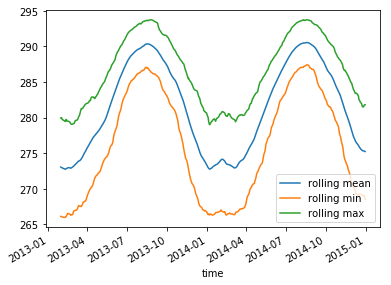

In [54]:
# Alternatively, we can resample the data to daily frequency first, using the .resample() method
# http://xarray.pydata.org/en/stable/generated/xarray.DataArray.resample.html

air_daily = ds.air.resample(time='1D').mean(dim='time') # mean value over 1 day (1D)

air_daily.rolling(time=30).mean().mean(dim=['lat','lon']).plot(label='rolling mean')
air_daily.rolling(time=30).min().mean(dim=['lat','lon']).plot(label='rolling min')
air_daily.rolling(time=30).max().mean(dim=['lat','lon']).plot(label='rolling max')
plt.legend()

Make spatial plots of both the time mean variables that were computed earlier (`air_mean` and `airC_mean`)

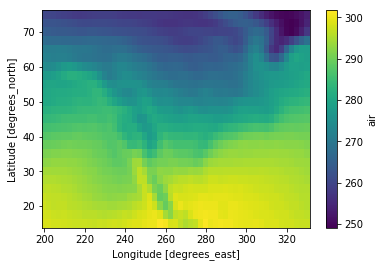

In [42]:
air_mean.plot()

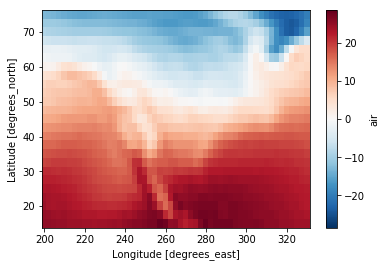

In [43]:
airC_mean.plot()

Use `.plot(center=273.15)` to adjust the colorscheme of the plot in Kelvin.

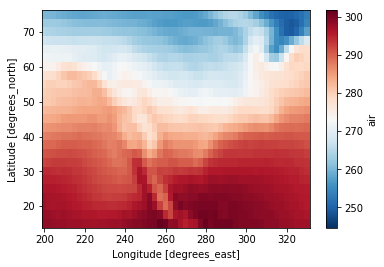

In [44]:
air_mean.plot(center=273.15)

# Output
Create a new dataset that contains both `air` and `airC` and write this to a netcdf file using the `.to_netcdf()` method. 

In [46]:
ds2 = ds
ds2['airC'] = airC
ds2.to_netcdf('test.nc')
ds2

/Users/leo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SerializationWarning: saving variable air with floating point data as an integer dtype without any _FillValue to use for NaNs
  app.launch_new_instance()


<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
    airC     (time, lat, lon) float32 -31.949997 -30.649994 ... 22.540009
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

# More advanced stuff

Use the `xr.where()` function to find out which gridpoints see a temperature below freezing during any given point in time. 

http://xarray.pydata.org/en/stable/generated/xarray.where.html

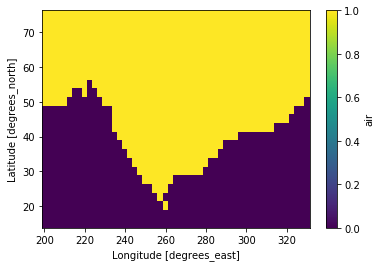

In [49]:
mask_freezing = xr.where(airC < 0.0, 1, 0).max(dim='time')
mask_freezing.plot()

The next bit of code computes the 4 seasonal means (DJF, MAM, JJA, SON)

In [41]:
t_season = ds.air.groupby('time.season').mean(dim='time') - 273.15

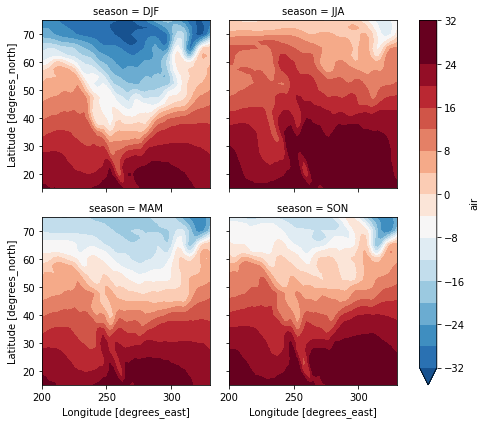

In [45]:
t_season.plot.contourf(x='lon', y='lat', col='season', col_wrap=2, levels=np.arange(-32,33,4))

Similarly, now plot the median (not mean) for 2 years in the dataset.

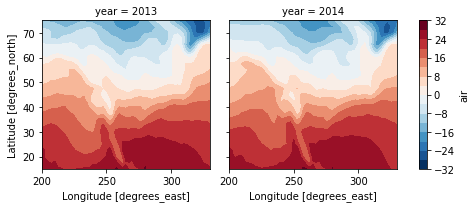

In [53]:
t_year = ds.air.groupby('time.year').median(dim='time') - 273.15
t_year.plot.contourf(x='lon', y='lat', col='year', levels=np.arange(-32,33,4))

# Georeferenced plotting
This requires the Cartopy library to be installed

In [29]:
import cartopy.crs as ccrs

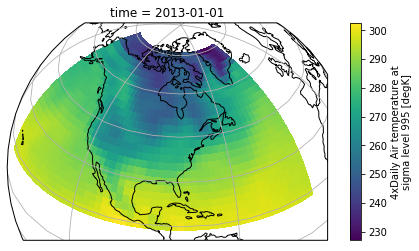

In [33]:
f = plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
# ax is an empty plot. We now plot the variable t_average onto ax# the keyword "transform" tells the function in which projection the air temp data is stored
ds.air[0].plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(); ax.gridlines();